# Step 2: Data Wrangling

## Project Goal:

**To develop a model that can predict the number of awards per 100 Full-Time Undergraduates with high accuracy.** 
The features included institutional characteristics.

## Data Source: 

Data were retrieved from “College Completion Dataset” that was available at https://www.kaggle.com/datasets/thedevastator/boost-student-success-with-college-completion-da/data?select=cc_institution_details.csv . This dataset was originally authored by Jonathan Ortiz (see https://data.world/databeats). The dataset was available for public use without copyright violations.

## Definition of Data Features

   - **chronname**: The name of the college or university. 
   - **city:** The city in which the college is located. 
   - **state:** The state in which the college is located. 
   - **control:** The type of college (public or private). 
   - **basic:** A flag indicating whether the college is a basic institution. 
   - **hbcu:** A flag indicating whether the college is a historically black college or university. 
   - **flagship:** A flag indicating whether the college is a flagship institution. 
   - **long_x:** The longitude of the college. 
   - **lat_y:** The latitude of the college. 
   - **site:** The website of the college. 
   - **student_count:** The number of students enrolled at the college. 
   - **awards_per_state_value:** The number of awards per 100 full-time undergraduates compared to the state average.
   - **awards_per_natl_value:** The number of awards per 100 full-time undergraduates compared to the national average. 
   - **exp_award_value:** The amount of money spent per award. 
   - **exp_award_state_value:** The amount of money spent per award compared to the state average. 
   - **exp_award_natl_value:** The amount of money spent per award compared to the national average. 
   - **exp_award_percentile:** The percentile of the amount of money spent per award compared to other colleges. 
   - **ft_pct:** The percentage of full-time students. 
   - **fte_value:** The number of full-time equivalent students. 
   - **fte_percentile:** The percentile of the number of full-time equivalent students compared to other colleges.
   - **med_sat_value:** Median SAT score among first time students.            
   - **med_sat_percentile:** 
   - **aid_value:** The average amount in financial aid.          
   - **aid_percentile:** The financial aid percentage.        
   - **endow_value:** The endowment values.        
   - **endow_percentile:** Percentage in endowment.   
   - **grad_100_value:** The number of students who graduated within 100% of normal time.     
   - **grad_100_percentile:** The percentage of students who graduated within 100% of normal time.   
   - **grad_150_value:** The number of students who graduated within 150% of normal time.       
   - **grad_150_percentile:** The percentage of students who graduated within 150% of normal time.   
   - **pell_value:** The amount of funds under Pell grant.        
   - **pell_percentile:** The percentage of Pell grant.   
   - **retain_value:** The number of students retained in the same institution.       
   - **retain_percentile:** The retention percentage.
   - **vsa_grad_elsewhere_after6_first:** The number of students who graduated from another institution after 6 years of first enrollment. 
   - **vsa_enroll_after6_first:** The number of students who enrolled after 6 years of first enrollment. 
   - **vsa_enroll_elsewhere_after6_first:** The number of students who enrolled at another institution after 6 years of first enrollment. 
   - **vsa_grad_after4_transfer:** The number of students who graduated after 4 years of transfer enrollment. 
   - **vsa_grad_elsewhere_after4_transfer:** The number of students who graduated from another institution after 4 years of transfer enrollment. 
   - **vsa_enroll_after4_transfer:** The number of students who enrolled after 4 years of transfer enrollment.
   - **vsa_enroll_elsewhere_after4_transfer:** The number of students who enrolled at another institution after 4 years of transfer enrollment. 
   - **vsa_grad_after6_transfer:** The number of students who graduated after 6 years of transfer enrollment.
   - **vsa_grad_elsewhere_after6_transfer:** The number of students who graduated from another institution after 6 years of transfer enrollment. 
   - **vsa_enroll_after6_transfer:** The number of students who enrolled after 6 years of transfer enrollment.
   - **vsa_enroll_elsewhere_after6_transfer:** The number of students who enrolled at another institution after 6 years of transfer enrollment. 
   - **similar:** A flag indicating whether the college is similar to other colleges in the dataset. 
   - **state_sector_ct:** The number of colleges in the same state and sector. 
   - **carnegie_ct:** The number of colleges in the same Carnegie classification. 
   - **counted_pct:** The percentage of students who are counted in the dataset. 
   - **cohort_size:** The size of the cohort. 

## Objective

Load the dataset from the CSV file and clean it for future exploration and modelling.

## Packages and Libraries

In [1]:
#Import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

## Data 

In [2]:
#Load the dataset
data = pd.read_csv('cc_institution_details.csv')

#Copy the dataset
df = data.copy()
#Drop the 'index' column
df = df.drop(columns=['index'])
#Display first 2 rows
print(df.head(2))

   unitid                            chronname        city    state   level  \
0  100654               Alabama A&M University      Normal  Alabama  4-year   
1  100663  University of Alabama at Birmingham  Birmingham  Alabama  4-year   

  control                                              basic hbcu flagship  \
0  Public  Masters Colleges and Universities--larger prog...    X      NaN   
1  Public  Research Universities--very high research acti...  NaN      NaN   

      long_x  ...  vsa_grad_after6_transfer  \
0 -86.568502  ...                      36.4   
1 -86.809170  ...                       NaN   

  vsa_grad_elsewhere_after6_transfer  vsa_enroll_after6_transfer  \
0                                5.6                        17.2   
1                                NaN                         NaN   

   vsa_enroll_elsewhere_after6_transfer  \
0                                  11.1   
1                                   NaN   

                                             simil

In [3]:
print(df.shape)

(3798, 62)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [5]:
#Convert columns to 'objects'
columns_1 = ['unitid', 'long_x', 'lat_y', 'vsa_year']
df[columns_1] = df[columns_1].astype(object)

In [6]:
#Split the values in 'counted_pct' column by the | symbol and keep the first part then
#Convert to a float
df['counted_pct']= df['counted_pct'].str.split('|').str[0].astype(float)
print(df['counted_pct'].head())

0     99.7
1     56.0
2    100.0
3     43.1
4     88.0
Name: counted_pct, dtype: float64


## Duplicate Values

In [7]:
print(df.duplicated().value_counts())

False    3798
Name: count, dtype: int64


Great! There are no duplicate records in the dataset.

## Missing Values by Column

In [8]:
#Count the number of missing values in each column, Claculate the percentages, and sort in descending order.
#Display only values that are more than zero in counting.
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing_filtered = missing[missing['count'] > 0]
missing_filtered.sort_values(by='count', ascending=False)

,count,%
flagship,3748,98.683518
hbcu,3704,97.525013
vsa_enroll_elsewhere_after4_transfer,3528,92.890995
vsa_grad_elsewhere_after4_transfer,3528,92.890995
vsa_enroll_after4_transfer,3528,92.890995
vsa_grad_after4_transfer,3528,92.890995
vsa_grad_after6_transfer,3528,92.890995
vsa_grad_elsewhere_after6_transfer,3528,92.890995
vsa_enroll_after6_transfer,3528,92.890995
vsa_enroll_elsewhere_after6_transfer,3528,92.890995


It seems there are very few '**flagship and hbcu**' institutions in the dataset. Similarly, there are few students who transferred after 4 or 6 years. Therefore, it is possible these features have no missing values and they will not be dropped but re-classified or scored as 'zero' in the future. Missing values in the **similar** column will be filled with 'none'. The missing values in the '**site**' column will be filled with 'no site' label. The '**nicknames**' column will be dropped, it will not be useful for the project goal. The missing values in the following features will be imputed with a mean value: *ft_fac_value; ft_fac_percentile; ft_pct; aid_percentile; aid_value; pell_value; pell_percentile*.	 

**Missing Values by State**

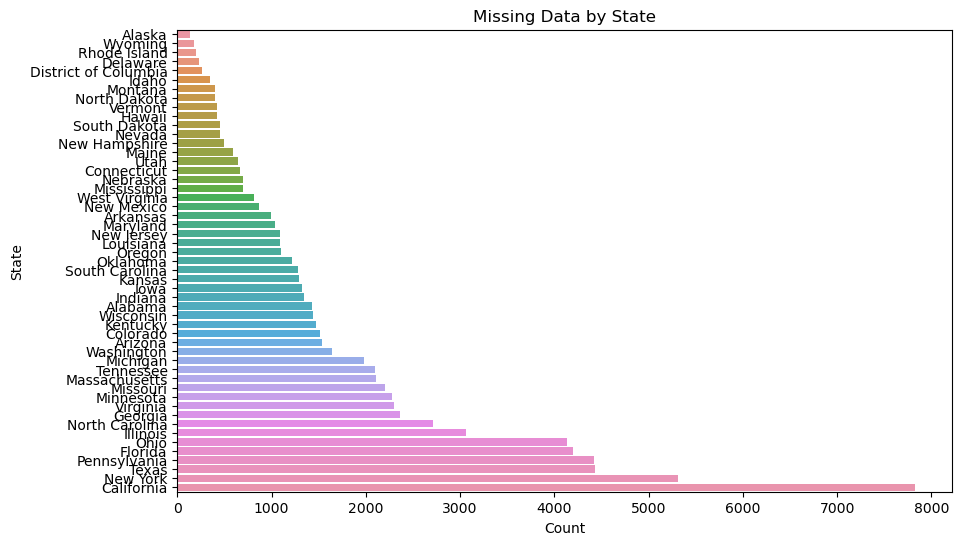

In [9]:
num_missing = df.groupby('state').apply(lambda x: x.isnull().sum())
total_miss = num_missing.sum(axis=1).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=total_miss, y=total_miss.index)
plt.title('Missing Data by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show();

California and New York states appear to have the highst number of missing data. Similarly, Texas, Pennsylvannia, Florida, and Ohio have significant data missing.

In [10]:
#Impute with corresponding averages in the 'ft_fac_value; ft_fac_percentile; ft_pct'; 
#'aid_percentile; aid_value; pell_value; pell_percentile' columns.
cols = ['ft_fac_value', 'ft_fac_percentile', 'ft_pct', 'aid_percentile', 'aid_value', 'pell_value', 'pell_percentile']
df[cols] = df[cols].fillna(df[cols].mean())
#Fill missing values in flagship and hbcu columns with 'no'
df['flagship'] = df['flagship'].fillna('no')
df['hbcu'] = df['hbcu'].fillna('no')
#Fill missing entries in 'similar' column with 'none'
df['similar'] = df['similar'].fillna('none')
#Fill missing entries in 'site' column with 'no site'
df['site'] = df['site'].fillna('no site')
#Remove column 'nicknames'
df.drop(['nicknames'], inplace =True, axis=1)

**Visualize the Missing Data**

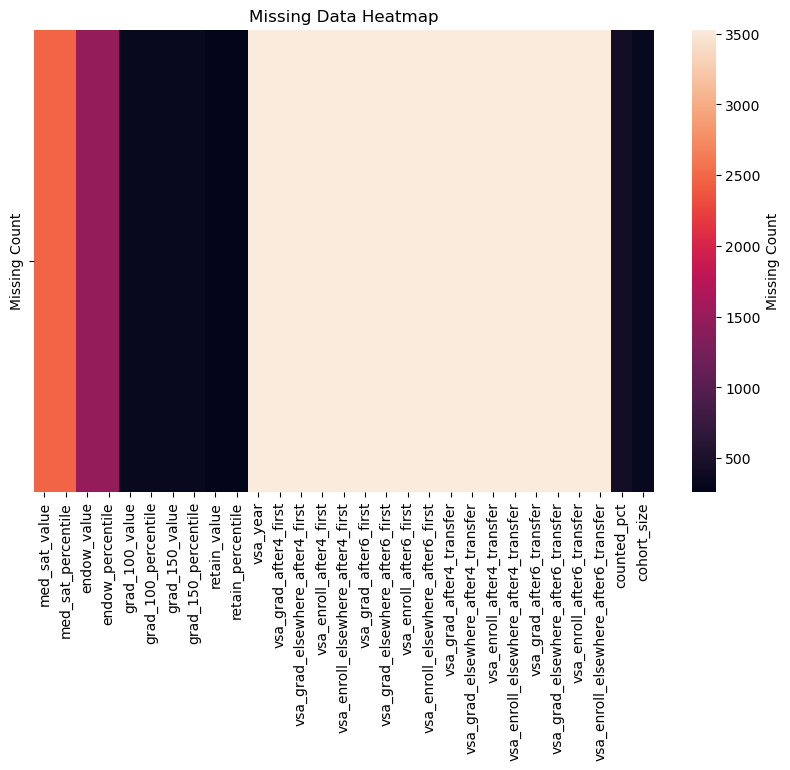

In [11]:
#Get the sum of missing values
miss_2 = df.isnull().sum()
miss_2filtered = miss_2[miss_2 > 0]
#Convert the Series into a DataFrame
miss_df = pd.DataFrame({'Missing Count': miss_2filtered})
#Visualize the heatmap of missing data
plt.figure(figsize=(10,6))
sns.heatmap(miss_df.T, cbar_kws={'label': 'Missing Count'})
plt.title('Missing Data Heatmap')
plt.show();

Student transfer records are missing a lot of data. There is a possibility that the number of transfer students is very small and therefore the entries should be zero or the data are genuinely missing. Nonetheless, I won't be able to establish the truth from the given dataset. Hence, the corresponding columns will be dropped.

In [12]:
columns = ['vsa_enroll_elsewhere_after4_transfer','vsa_grad_elsewhere_after4_transfer',
           'vsa_enroll_after4_transfer','vsa_grad_after4_transfer','vsa_grad_after6_transfer',
           'vsa_grad_elsewhere_after6_transfer','vsa_enroll_after6_transfer','vsa_enroll_elsewhere_after6_transfer',
           'vsa_enroll_elsewhere_after6_first','vsa_enroll_after6_first','vsa_grad_elsewhere_after6_first',
           'vsa_grad_after6_first','vsa_enroll_elsewhere_after4_first','vsa_enroll_after4_first',
           'vsa_grad_elsewhere_after4_first','vsa_grad_after4_first','vsa_year']
df = df.drop(columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unitid                  3798 non-null   object 
 1   chronname               3798 non-null   object 
 2   city                    3798 non-null   object 
 3   state                   3798 non-null   object 
 4   level                   3798 non-null   object 
 5   control                 3798 non-null   object 
 6   basic                   3798 non-null   object 
 7   hbcu                    3798 non-null   object 
 8   flagship                3798 non-null   object 
 9   long_x                  3798 non-null   object 
 10  lat_y                   3798 non-null   object 
 11  site                    3798 non-null   object 
 12  student_count           3798 non-null   int64  
 13  awards_per_value        3798 non-null   float64
 14  awards_per_state_value  3798 non-null   

Other missing data will be handled later in the project after extensive exploration data analysis.

In [13]:
df.to_csv('collegedata.csv', index=False)